In [166]:
#firstly, importing the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
#loading the dataset
df = pd.read_csv(r"./data/ufc-fighters-statistics.csv")

In [168]:
df.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [169]:
df.shape

(4111, 18)

In [170]:
df.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


In [171]:
df.isnull().sum() #checks for null values

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

In [172]:
df.duplicated().sum() #checks for duplicated values

0

In [173]:
#cleaning the dataset
df.drop(columns=['nickname'],inplace=True)  #nickname is not useful for analysis so i droppped it
df.dropna(subset=['height_cm','weight_in_kg'],inplace=True) #also dropped rows which had nulls values for height and weight

In [174]:
#filling the missing values with median for numerical columns 
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median())
    
#filling the missing values with mode for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0])

In [175]:
df.info() #info of dataset after cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 3807 entries, 0 to 4110
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          3807 non-null   object 
 1   wins                                          3807 non-null   int64  
 2   losses                                        3807 non-null   int64  
 3   draws                                         3807 non-null   int64  
 4   height_cm                                     3807 non-null   float64
 5   weight_in_kg                                  3807 non-null   float64
 6   reach_in_cm                                   2183 non-null   float64
 7   stance                                        3257 non-null   object 
 8   date_of_birth                                 2973 non-null   object 
 9   significant_strikes_landed_per_minute         3807 non-null   float6

In [176]:
#since wins will be more for a fighter with longer career, we create new col win_percentage to be more accurate
df['total_fights']=df['wins']+df['losses']+df['draws']
df['win_percentage']=((df['wins']/df['total_fights'])*100).round(2)

In [177]:
#also we will find the age of the fighters so that we can check performance with respect to age
from datetime import datetime

current=pd.to_datetime('today')
df['date_of_birth']=pd.to_datetime(df['date_of_birth'],errors='coerce')
df['age']=(current-df['date_of_birth']).dt.days//365

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

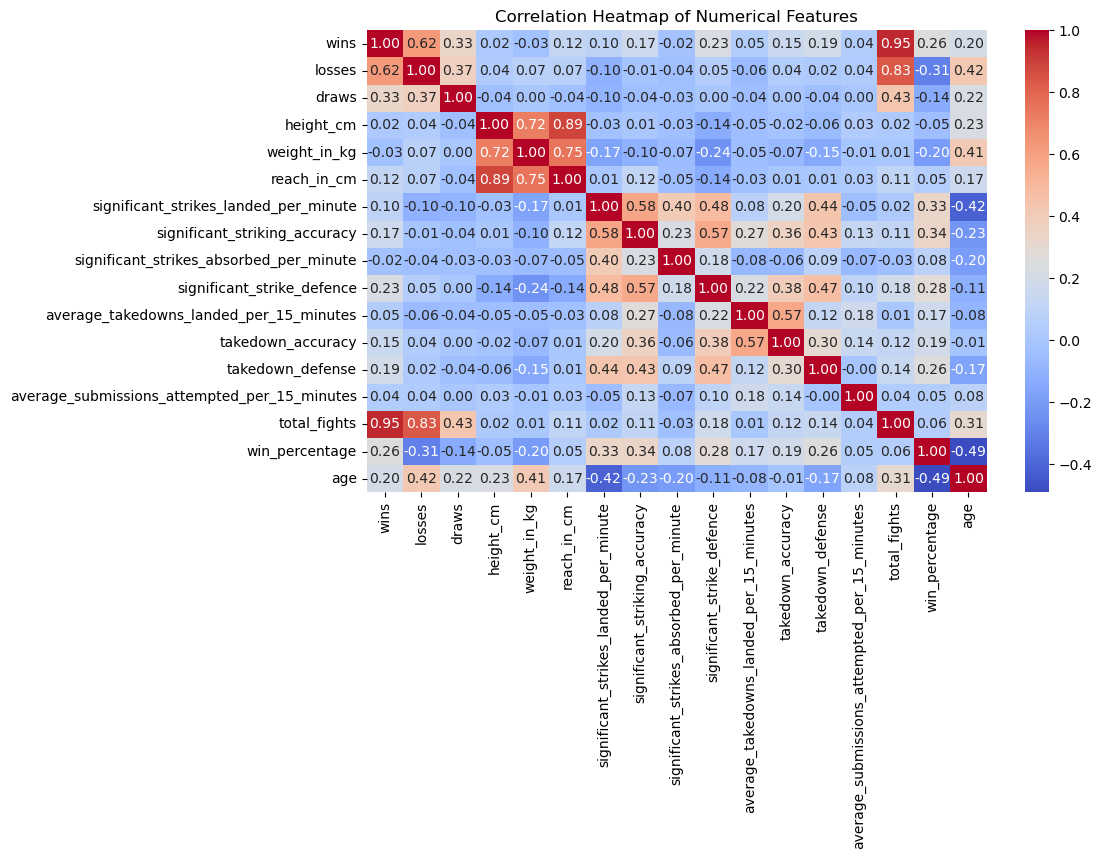

In [178]:
#correlation heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")

Text(0.5, 1.0, 'Distribution of Wins')

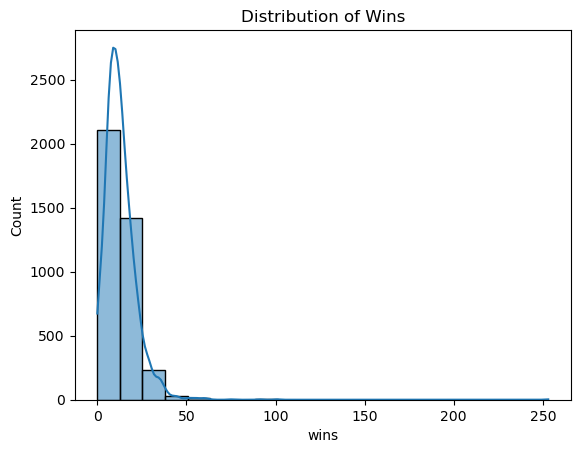

In [179]:
#histogram to see the distribution of wins
sns.histplot(df['wins'],bins=20,kde=True)
plt.title("Distribution of Wins")

Text(0.5, 1.0, 'Average Wins by Stance')

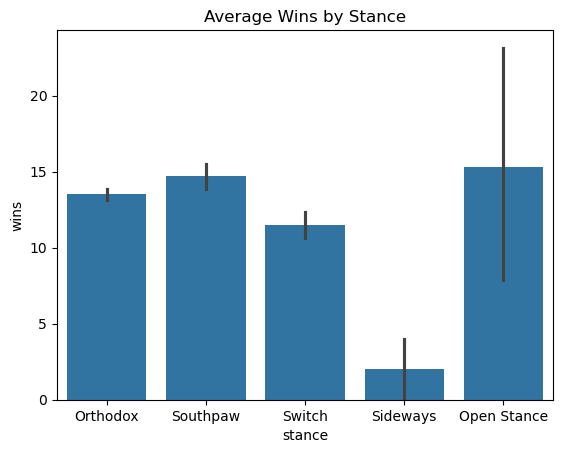

In [180]:
#Plot average number of wins for each fighting stance
sns.barplot(x=df['stance'],y=df['wins'],data=df)
plt.title("Average Wins by Stance")

Text(0.5, 1.0, 'Height vs Reach')

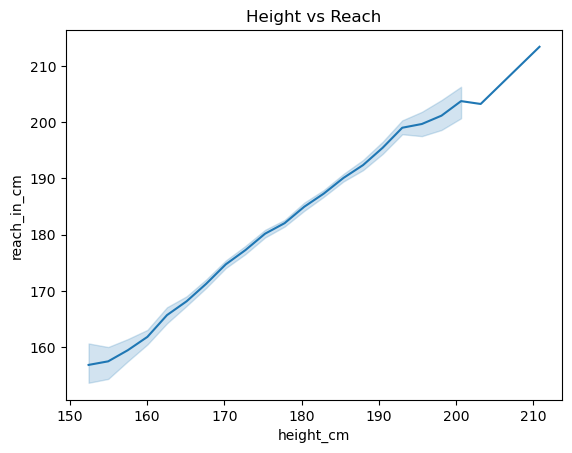

In [181]:
#height vs reach relationship
sns.lineplot(x=df['height_cm'],y=df['reach_in_cm'],data=df)
plt.title("Height vs Reach")

Text(0.5, 1.0, 'Strikes Landed vs Absorbed (Colored by Win %)')

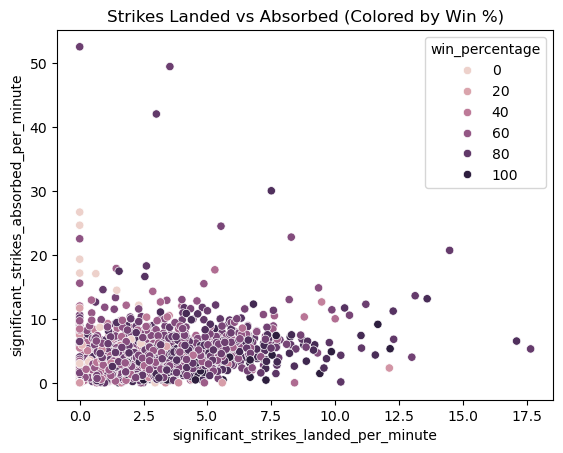

In [182]:
#significant strikes landed per minute vs strikes absorbed
sns.scatterplot(x=df['significant_strikes_landed_per_minute'],y=df['significant_strikes_absorbed_per_minute'],data=df,hue='win_percentage')
plt.title("Strikes Landed vs Absorbed (Colored by Win %)")

Text(0.5, 1.0, 'Distribution of Fighter Stances')

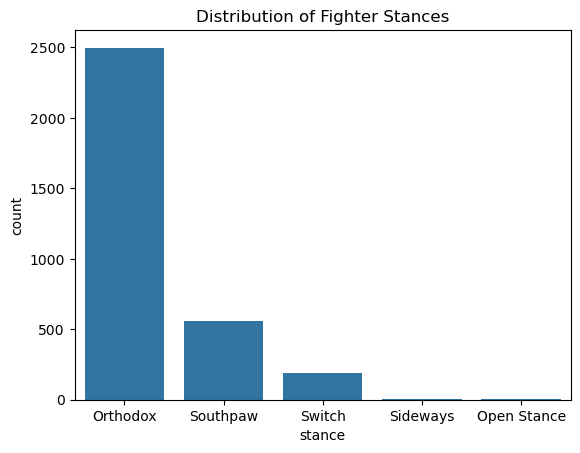

In [183]:
#Distribution of fighter stances
sns.countplot(x=df['stance'],data=df)
plt.title("Distribution of Fighter Stances")

Text(0.5, 1.0, 'Win Percentage by Stance')

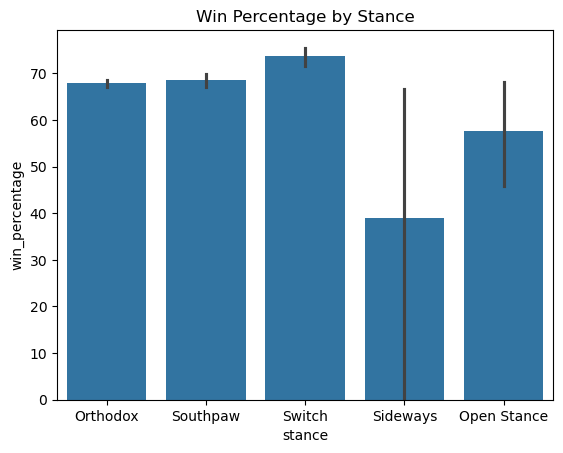

In [184]:
#Win percentage by stance
sns.barplot(x="stance", y="win_percentage", data=df)
plt.title("Win Percentage by Stance")

Text(0.5, 1.0, 'Age vs Win Percentage')

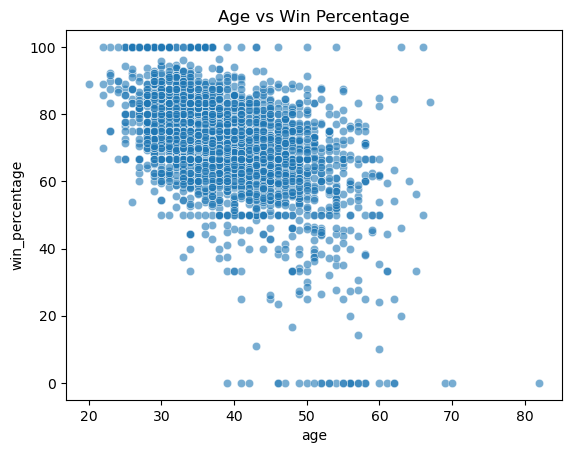

In [185]:
#Age vs win percentage
sns.scatterplot(x="age", y="win_percentage", data=df, alpha=0.6)
plt.title("Age vs Win Percentage")

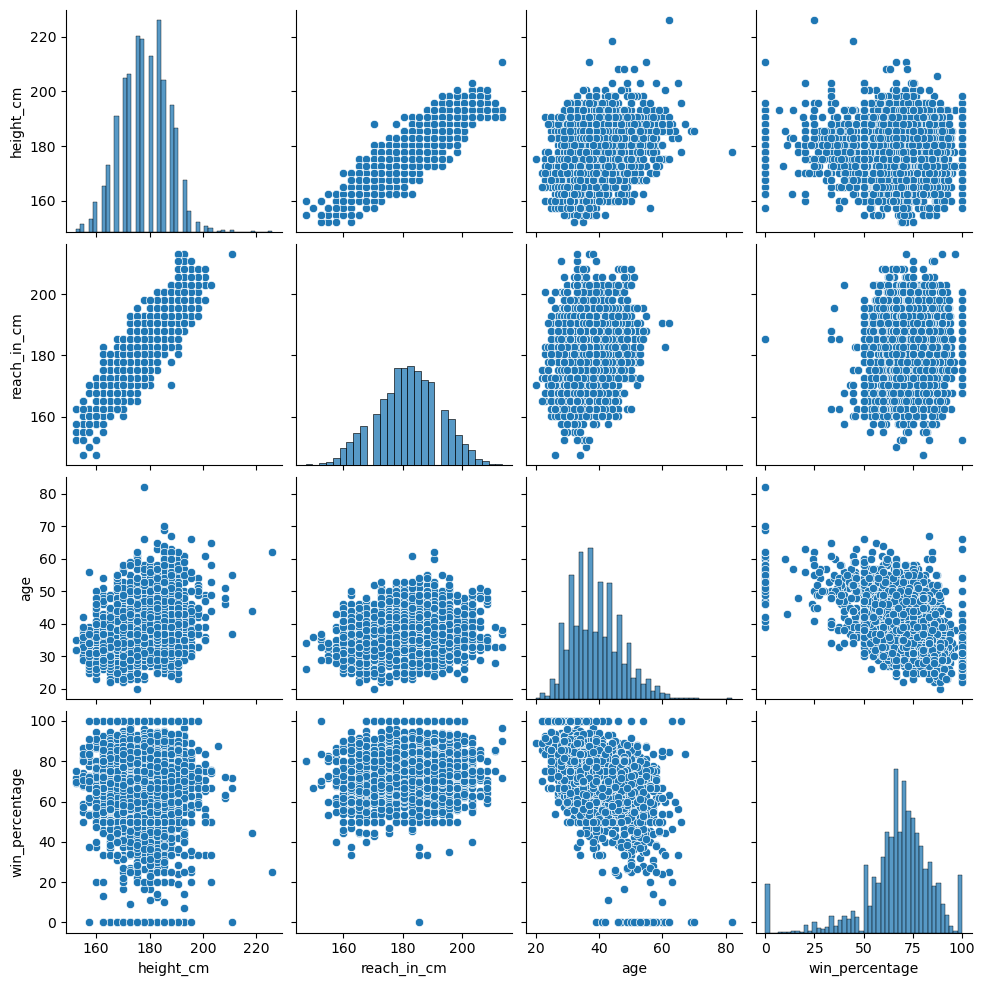

In [186]:
#relationships between height, reach, age and win percentage using pairplot
sns.pairplot(df[["height_cm", "reach_in_cm", "age", "win_percentage"]])

Text(0.5, 1.0, 'Distribution of Average Takedowns Landed per 15 Minutes')

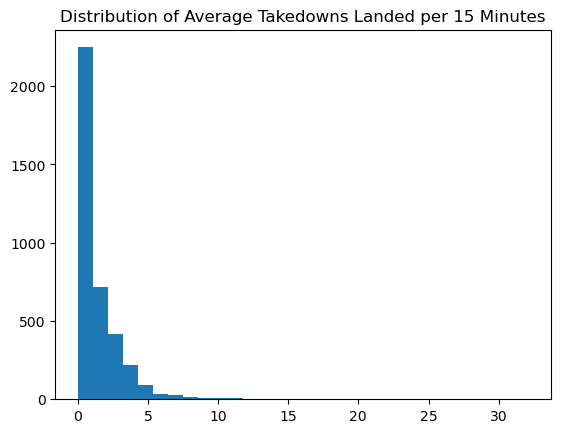

In [187]:
#Distribution of takedowns per 15 minutes
plt.hist(df['average_takedowns_landed_per_15_minutes'], bins=30)
plt.title('Distribution of Average Takedowns Landed per 15 Minutes')

<Axes: xlabel='height_cm', ylabel='win_percentage'>

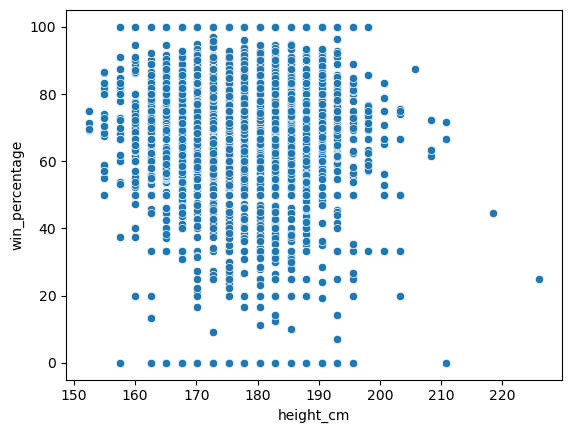

In [188]:
#height vs win%
sns.scatterplot(x=df['height_cm'],y=df['win_percentage'],data=df)

<Axes: xlabel='significant_striking_accuracy', ylabel='win_percentage'>

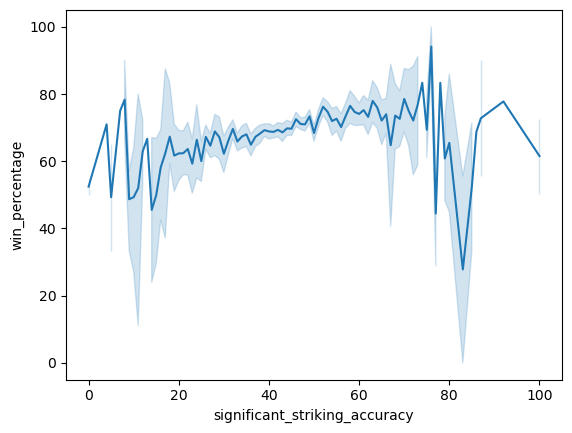

In [ ]:
#wins vs significant striking accuracy
sns.lineplot(y=df['win_percentage'],x=df['significant_striking_accuracy'],data=df)

<Axes: xlabel='significant_strike_defence', ylabel='significant_strikes_absorbed_per_minute'>

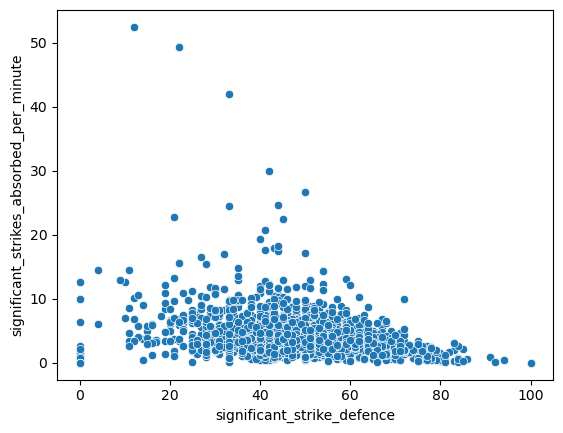

In [190]:
#Scatterplot of strike defense vs strikes absorbed
sns.scatterplot(x="significant_strike_defence", y="significant_strikes_absorbed_per_minute", data=df)

<Axes: xlabel='age', ylabel='win_percentage'>

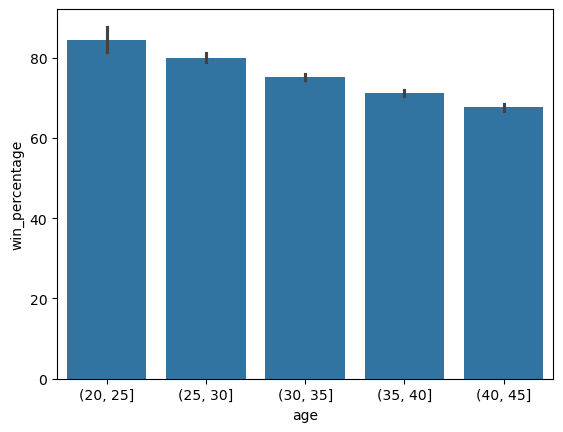

In [191]:
# Age groups vs win percentage
sns.barplot(x=pd.cut(df['age'], bins=[20,25,30,35,40,45]), y="win_percentage", data=df)